In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import plotly.figure_factory as ff
import matplotlib.dates as mdates
from datetime import datetime

In [5]:
ls

2010 Census Tracts/
ACS5yearBK/
CCRB Data Layout Table.xlsx
NYC Street Centerline (CSCL)/
NYC Street Centerline (CSCL).zip
NYC_Police_Precincts_2020/
NYPD-repository/
NYPD_Arrest_Historic_DataDictionary.xlsx
NYPD_Arrests_Data__Historic_.csv
allegations_20200726939.csv
nyc_2010censusblocks_2020policeprecincts (1).csv


In [7]:
#read in allegations file
df = pd.read_csv('allegations_20200726939.csv')

In [13]:
#create column of total complaints by officer id
df['tot_complaints'] = df.groupby(['unique_mos_id'])['unique_mos_id'].transform('count')

In [68]:
#create date_closed col of m/y
df['date_closed'] = pd.to_datetime(df['year_closed'].astype('str') + 
                                   '/' + 
                                   df['month_closed'].astype('str') + 
                                   '/01')

In [108]:
#create date_received col of m/y
df['date_received'] = pd.to_datetime(df['year_received'].astype('str') + 
                                     '/' + 
                                     df['month_received'].astype('str') + 
                                     '/01')

In [208]:
df

,unique_mos_id,first_name,last_name,command_now,complaint_id,month_received,year_received,month_closed,year_closed,command_at_incident,...,complainant_age_incident,fado_type,allegation,precinct,contact_reason,outcome_description,board_disposition,tot_complaints,date_closed,date_received
0,10004,Jonathan,Ruiz,078 PCT,42835,7,2019,5,2020,078 PCT,...,38.0,Abuse of Authority,Failure to provide RTKA card,78.0,Report-domestic dispute,No arrest made or summons issued,Substantiated (Command Lvl Instructions),1,2020-05-01,2019-07-01
1,10007,John,Sears,078 PCT,24601,11,2011,8,2012,PBBS,...,26.0,Discourtesy,Action,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges),3,2012-08-01,2011-11-01
2,10007,John,Sears,078 PCT,24601,11,2011,8,2012,PBBS,...,26.0,Offensive Language,Race,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges),3,2012-08-01,2011-11-01
3,10007,John,Sears,078 PCT,26146,7,2012,9,2013,PBBS,...,45.0,Abuse of Authority,Question,67.0,PD suspected C/V of violation/crime - street,No arrest made or summons issued,Substantiated (Charges),3,2013-09-01,2012-07-01
4,10009,Noemi,Sierra,078 PCT,40253,8,2018,2,2019,078 PCT,...,16.0,Force,Physical force,67.0,Report-dispute,Arrest - other violation/crime,Substantiated (Command Discipline A),1,2019-02-01,2018-08-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33353,9992,Tomasz,Pulawski,078 PCT,35671,8,2016,2,2017,066 PCT,...,21.0,Discourtesy,Word,66.0,Moving violation,Moving violation summons issued,Unsubstantiated,6,2017-02-01,2016-08-01
33354,9992,Tomasz,Pulawski,078 PCT,35671,8,2016,2,2017,066 PCT,...,21.0,Abuse of Authority,Interference with recording,66.0,Moving violation,Moving violation summons issued,Unsubstantiated,6,2017-02-01,2016-08-01
33355,9992,Tomasz,Pulawski,078 PCT,35671,8,2016,2,2017,066 PCT,...,21.0,Abuse of Authority,Search (of person),66.0,Moving violation,Moving violation summons issued,Substantiated (Formalized Training),6,2017-02-01,2016-08-01
33356,9992,Tomasz,Pulawski,078 PCT,35671,8,2016,2,2017,066 PCT,...,21.0,Abuse of Authority,Vehicle search,66.0,Moving violation,Moving violation summons issued,Substantiated (Formalized Training),6,2017-02-01,2016-08-01


In [109]:
#create df of complaints per officer
cmplnts_per_ofcr = df[['unique_mos_id','tot_complaints']].drop_duplicates().reset_index(drop=True)

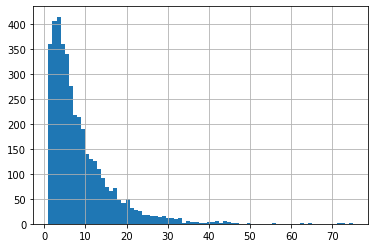

In [110]:
#histogram of complaints per officer
cmplnts_per_ofcr['tot_complaints'].hist(bins=75)

In [111]:
#how many ids have more than 70 complaints
df[df['tot_complaints'] > 70]['unique_mos_id'].unique()

array([18530, 18589, 18731, 19489, 25861])

In [112]:
#turn >70 complaints into a top5 worst officers dataframe
top5 = df[df['tot_complaints'] > 70]

In [113]:
#take a look at the normalized results
top5['board_disposition'].value_counts(normalize=True)

Unsubstantiated                         0.529891
Exonerated                              0.285326
Substantiated (Charges)                 0.149457
Substantiated (No Recommendations)      0.010870
Substantiated (Command Discipline)      0.010870
Substantiated (Instructions)            0.005435
Substantiated (Command Discipline B)    0.002717
Substantiated (Command Discipline A)    0.002717
Substantiated (Formalized Training)     0.002717
Name: board_disposition, dtype: float64

In [114]:
#look at which officer had most complaints against
top5.sort_values(by='tot_complaints',ascending=False)

,unique_mos_id,first_name,last_name,command_now,complaint_id,month_received,year_received,month_closed,year_closed,command_at_incident,...,complainant_age_incident,fado_type,allegation,precinct,contact_reason,outcome_description,board_disposition,tot_complaints,date_closed,date_received
7885,18731,Daniel,Sbarra,DB CEIS,12981,2,2007,8,2007,NARCBBN,...,27.0,Force,Physical force,81.0,PD suspected C/V of violation/crime - street,Arrest - other violation/crime,Unsubstantiated,75,2007-08-01,2007-02-01
7886,18731,Daniel,Sbarra,DB CEIS,12981,2,2007,8,2007,NARCBBN,...,27.0,Abuse of Authority,Question and/or stop,81.0,PD suspected C/V of violation/crime - street,Arrest - other violation/crime,Exonerated,75,2007-08-01,2007-02-01
7902,18731,Daniel,Sbarra,DB CEIS,19817,1,2010,4,2011,NARCBBN,...,NaN,Abuse of Authority,Premises entered and/or searched,81.0,Execution of search warrant,Arrest - other violation/crime,Exonerated,75,2011-04-01,2010-01-01
7901,18731,Daniel,Sbarra,DB CEIS,19029,9,2009,2,2011,NARCBBN,...,31.0,Force,Physical force,81.0,Other,No arrest made or summons issued,Exonerated,75,2011-02-01,2009-09-01
7900,18731,Daniel,Sbarra,DB CEIS,19029,9,2009,2,2011,NARCBBN,...,20.0,Offensive Language,Sexual orientation,81.0,Other,No arrest made or summons issued,Unsubstantiated,75,2011-02-01,2009-09-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7143,18589,Christophe,Mccormack,DB CED,6147,2,2003,3,2004,025 PCT,...,30.0,Discourtesy,Demeanor/tone,44.0,PD suspected C/V of violation/crime - street,Arrest - other violation/crime,Exonerated,72,2004-03-01,2003-02-01
7142,18589,Christophe,Mccormack,DB CED,6147,2,2003,3,2004,025 PCT,...,30.0,Abuse of Authority,Frisk and/or search,44.0,PD suspected C/V of violation/crime - street,Arrest - other violation/crime,Exonerated,72,2004-03-01,2003-02-01
7141,18589,Christophe,Mccormack,DB CED,6120,1,2003,1,2004,025 PCT,...,NaN,Abuse of Authority,Frisk and/or search,25.0,PD suspected C/V of violation/crime - street,Arrest - resisting arrest,Unsubstantiated,72,2004-01-01,2003-01-01
7140,18589,Christophe,Mccormack,DB CED,6120,1,2003,1,2004,025 PCT,...,41.0,Abuse of Authority,Frisk and/or search,25.0,PD suspected C/V of violation/crime - street,Arrest - resisting arrest,Unsubstantiated,72,2004-01-01,2003-01-01


In [115]:
#create Daniel Sbarra df of complaints against Daniel Sbarra
sbarra = top5[top5['unique_mos_id'] == 18731].sort_values(by='date_closed',ascending=True)

In [147]:
#some complaints are filed under the same id but have different complaints
sbarra['complaint_id'].unique()

array([ 6832,  7174,  8351,  8478,  9192, 10709, 12057, 11553, 12981,
       11303, 12387, 12872, 12249, 13197, 14924, 14996, 15200, 15670,
       12477, 18088, 19029, 19817, 19988, 20866, 22088, 22856, 21851,
       22996, 25825])

In [137]:
#what are the unique results of all Sbarra's complaints
sbarra['board_disposition'].unique()

array(['Unsubstantiated', 'Exonerated', 'Substantiated (Charges)',
       'Substantiated (Command Discipline)'], dtype=object)

In [139]:
#abbreviate complaint headers
sbarra['bd_abbr'] = sbarra['board_disposition'].copy().replace({'Unsubstantiated':'U',
                                                                'Exonerated':'X',
                                                                'Substantiated (Charges)':'S(c)',
                                                                'Substantiated (Command Discipline)':'S(cd)'})

In [140]:
#create dates and names for plot
dates = sbarra['date_received']
names = sbarra['bd_abbr']

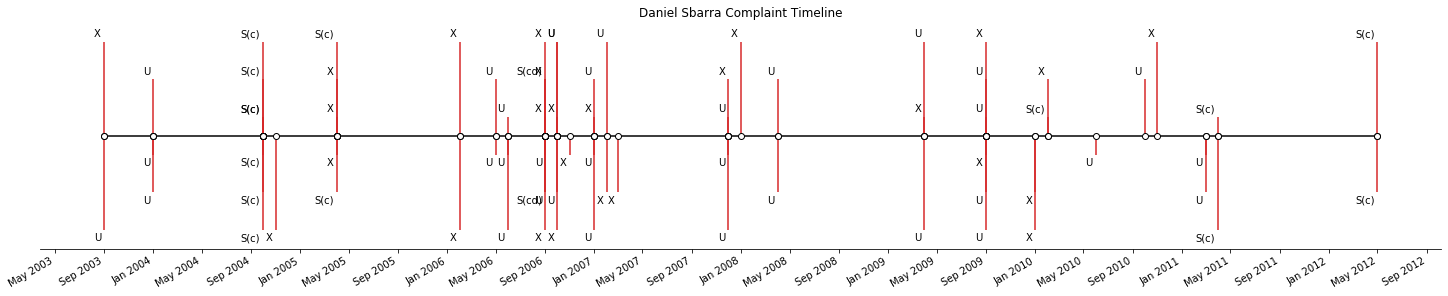

In [143]:
#matplotlob timeline
# Choose some nice levels
levels = np.tile([-5, 5, -3, 3, -1, 1],
                 int(np.ceil(len(dates)/6)))[:len(dates)]

# Create figure and plot a stem plot with the date
fig, ax = plt.subplots(figsize=(20, 4), constrained_layout=True)
ax.set(title="Daniel Sbarra Complaint Timeline")

markerline, stemline, baseline = ax.stem(dates, levels,
                                         linefmt="C3-", basefmt="k-",
                                         use_line_collection=True)

plt.setp(markerline, mec="k", mfc="w", zorder=3)

# Shift the markers to the baseline by replacing the y-data by zeros.
markerline.set_ydata(np.zeros(len(dates)))

# annotate lines
vert = np.array(['top', 'bottom'])[(levels > 0).astype(int)]
for d, l, r, va in zip(dates, levels, names, vert):
    ax.annotate(r, xy=(d, l), xytext=(-3, np.sign(l)*3),
                textcoords="offset points", va=va, ha="right")

# format xaxis with 4 month intervals
ax.get_xaxis().set_major_locator(mdates.MonthLocator(interval=4))
ax.get_xaxis().set_major_formatter(mdates.DateFormatter("%b %Y"))
plt.setp(ax.get_xticklabels(), rotation=30, ha="right")

# remove y axis and spines
ax.get_yaxis().set_visible(False)
for spine in ["left", "top", "right"]:
    ax.spines[spine].set_visible(False)

ax.margins(y=0.1)
plt.show()

In [196]:
#reformat neccessary columns for olotly gannt chart
sbarra_gnt = sbarra[['bd_abbr','date_received','date_closed','fado_type']]
sbarra_gnt.columns = ['Task','Start','Finish','Type']

In [197]:
sbarra_gnt['Type'].unique()

array(['Discourtesy', 'Force', 'Abuse of Authority', 'Offensive Language'],
      dtype=object)

In [199]:
dict(zip(sbarra_gnt['Type'].unique(),[(0,0,1),(1,0,0),(0,0,1),(1,0,0)]))

{'Discourtesy': (0, 0, 1),
 'Force': (1, 0, 0),
 'Abuse of Authority': (0, 0, 1),
 'Offensive Language': (1, 0, 0)}

In [200]:
sbarra_gnt = sbarra_gnt.sort_values(by='Start')

In [201]:
# Gantt chart in Plotly has mandatory format of data columns
sbarra_gnt.columns = ['Task', 'Start', 'Finish', 'Type']

colors = dict(zip(sbarra_gnt['Type'].unique(),[(0, 0, 0),(0,1,0),(0,0,1),(1,0,0)]))

fig_plotly = ff.create_gantt(sbarra_gnt, colors=colors, index_col='Type',
                             show_colorbar=True, bar_width=0.4, showgrid_x=True, showgrid_y=True)
fig_plotly.show()

In [203]:
sbarra.head()

,unique_mos_id,first_name,last_name,command_now,complaint_id,month_received,year_received,month_closed,year_closed,command_at_incident,...,fado_type,allegation,precinct,contact_reason,outcome_description,board_disposition,tot_complaints,date_closed,date_received,bd_abbr
7846,18731,Daniel,Sbarra,DB CEIS,6832,9,2003,2,2004,083 PCT,...,Discourtesy,Word,83.0,Other,No arrest made or summons issued,Unsubstantiated,75,2004-02-01,2003-09-01,U
7847,18731,Daniel,Sbarra,DB CEIS,6832,9,2003,2,2004,083 PCT,...,Force,Physical force,83.0,Other,No arrest made or summons issued,Exonerated,75,2004-02-01,2003-09-01,X
7848,18731,Daniel,Sbarra,DB CEIS,7174,1,2004,12,2004,083 PCT,...,Force,Physical force,83.0,EDP aided case,No arrest made or summons issued,Unsubstantiated,75,2004-12-01,2004-01-01,U
7849,18731,Daniel,Sbarra,DB CEIS,7174,1,2004,12,2004,083 PCT,...,Abuse of Authority,Other,83.0,EDP aided case,No arrest made or summons issued,Unsubstantiated,75,2004-12-01,2004-01-01,U
7913,18731,Daniel,Sbarra,DB CEIS,7174,1,2004,12,2004,083 PCT,...,Discourtesy,Word,83.0,EDP aided case,No arrest made or summons issued,Unsubstantiated,75,2004-12-01,2004-01-01,U


In [207]:
px.scatter(sbarra,sbarra['date_closed'],sbarra['board_disposition'])